# Mean Shift Test

Testing the implementation and use of Mean Shift here. Compare Mean Shift article in Obsidian Knowledge Repository.

In [43]:
# Imports

import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import datetime,time,warnings,sys,os,platform,itertools,math

import pandas as pd

from sklearn.cluster import MeanShift
from sklearn.datasets import load_sample_images

from plotly import express as px

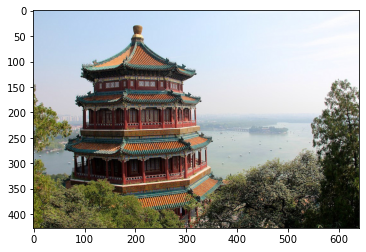

In [93]:
# Load sample dataset

dataset = load_sample_images()
img = dataset['images'][0]

plt.imshow(img)
plt.show()

In [58]:
L = []
for k0 in range(img.shape[0]):
    for k1 in range(img.shape[1]):
        L.append([k0,k1]+img[k0,k1,:].tolist())

df = pd.DataFrame(L).rename(columns={
    0:'x0',
    1:'x1',
    2:'R',
    3:'G',
    4:'B'
})

In [144]:
tf = df.sample(100)

avg_dist = 0
for r in itertools.combinations(tf.index.tolist(),2):
    # Vectors
    x0 = tf.loc[r[0]][['R','G','B']].values
    x1 = tf.loc[r[1]][['R','G','B']].values
    # Distance
    d = np.linalg.norm(x0-x1)
    # Add to avg distance
    avg_dist += d
    avg_dist /= 2

In [145]:
model = MeanShift(bandwidth=avg_dist/10)

model.fit(df[['R','G','B']].sample(1000).values)

df['Class'] = model.predict(df[['R','G','B']].values)

In [146]:
 px.scatter_3d(
    df.sample(1000), 
    x='R', 
    y='G', 
    z='B',
    color='Class'
)

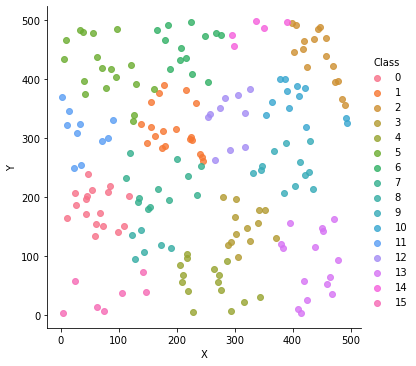

In [50]:
# Imports
import numpy as np
import random
import pandas as pd
import seaborn as sns
from sklearn.cluster import MeanShift

# Generate random data
df = pd.DataFrame()
df['X'] = random.sample(range(1, 500), 200)
df['Y'] = random.sample(range(1, 500), 200)
# Train a model
model = MeanShift(bandwidth=75)
model.fit(df[['X','Y']].values)
# Attach labels to data
df['Class'] = model.labels_
# Plot Result
sns.lmplot(
    data=df,
    x='X', 
    y='Y',
    hue='Class', 
    fit_reg=False
) 

In [45]:
model.cluster_centers_

array([[327.20833333, 239.20833333],
       [423.89473684, 141.15789474],
       [203.72222222, 435.94444444],
       [176.05555556, 140.        ],
       [117.83333333, 281.83333333],
       [ 77.61111111, 439.16666667],
       [ 54.66666667, 324.16666667],
       [441.4375    , 256.5       ],
       [350.875     ,  55.375     ],
       [160.6875    , 371.4375    ],
       [434.46153846,  45.23076923],
       [232.46153846, 287.23076923],
       [443.27272727, 338.27272727],
       [335.2       , 423.7       ],
       [ 53.44444444,  87.        ],
       [444.125     , 474.375     ]])

In [46]:
df['Size'] = 1

cf = pd.DataFrame(model.cluster_centers_).rename(columns={0:'X',1:'Y'})
cf['Class'] = -1
cf['Size'] = 2

In [47]:
df = pd.concat([df,cf],axis=0)

In [48]:
df

,X,Y,Class,Size
0,474.000000,96.000000,10,1
1,360.000000,224.000000,0,1
2,387.000000,130.000000,1,1
3,259.000000,212.000000,0,1
4,63.000000,53.000000,14,1
...,...,...,...,...
11,232.461538,287.230769,-1,2
12,443.272727,338.272727,-1,2
13,335.200000,423.700000,-1,2
14,53.444444,87.000000,-1,2


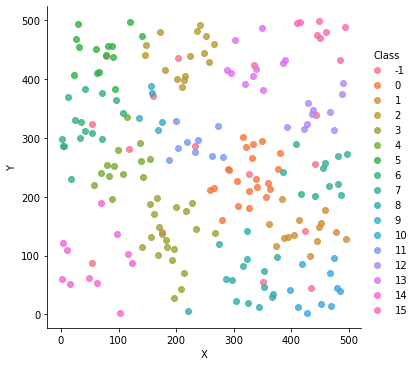

In [49]:
sns.lmplot(
    data=df,
    x='X', 
    y='Y',
    hue='Class', 
    #size='Size',
    fit_reg=False
) 

In [34]:
df

,X,Y,Class,Size
0,156.000000,372.000000,8,1
1,263.000000,9.000000,7,1
2,372.000000,323.000000,1,1
3,96.000000,304.000000,11,1
4,57.000000,16.000000,12,1
...,...,...,...,...
10,78.250000,455.000000,-1,2
11,66.166667,282.583333,-1,2
12,77.454545,51.636364,-1,2
13,428.400000,152.400000,-1,2


In [36]:
df['X'] = df['X'].astype('int')
df['Y'] = df['Y'].astype('int')

In [42]:
df[df['Y'].isna()]

,X,Y,Class,Size
